In [1]:
# import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
import pandas as pd
%matplotlib inline

In [2]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
boston['data'].shape

(506, 13)

In [5]:
data = pd.DataFrame(data = boston['data'], columns = boston['feature_names'])
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
data['RAD'].value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

In [7]:
target = pd.Series(boston['target'])
target.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
dtype: float64

In [8]:
target.describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
dtype: float64

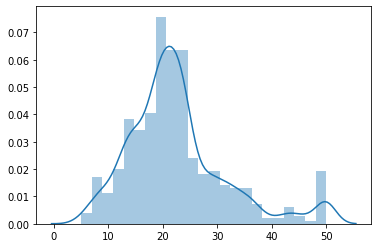

In [9]:
sns.distplot(target)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


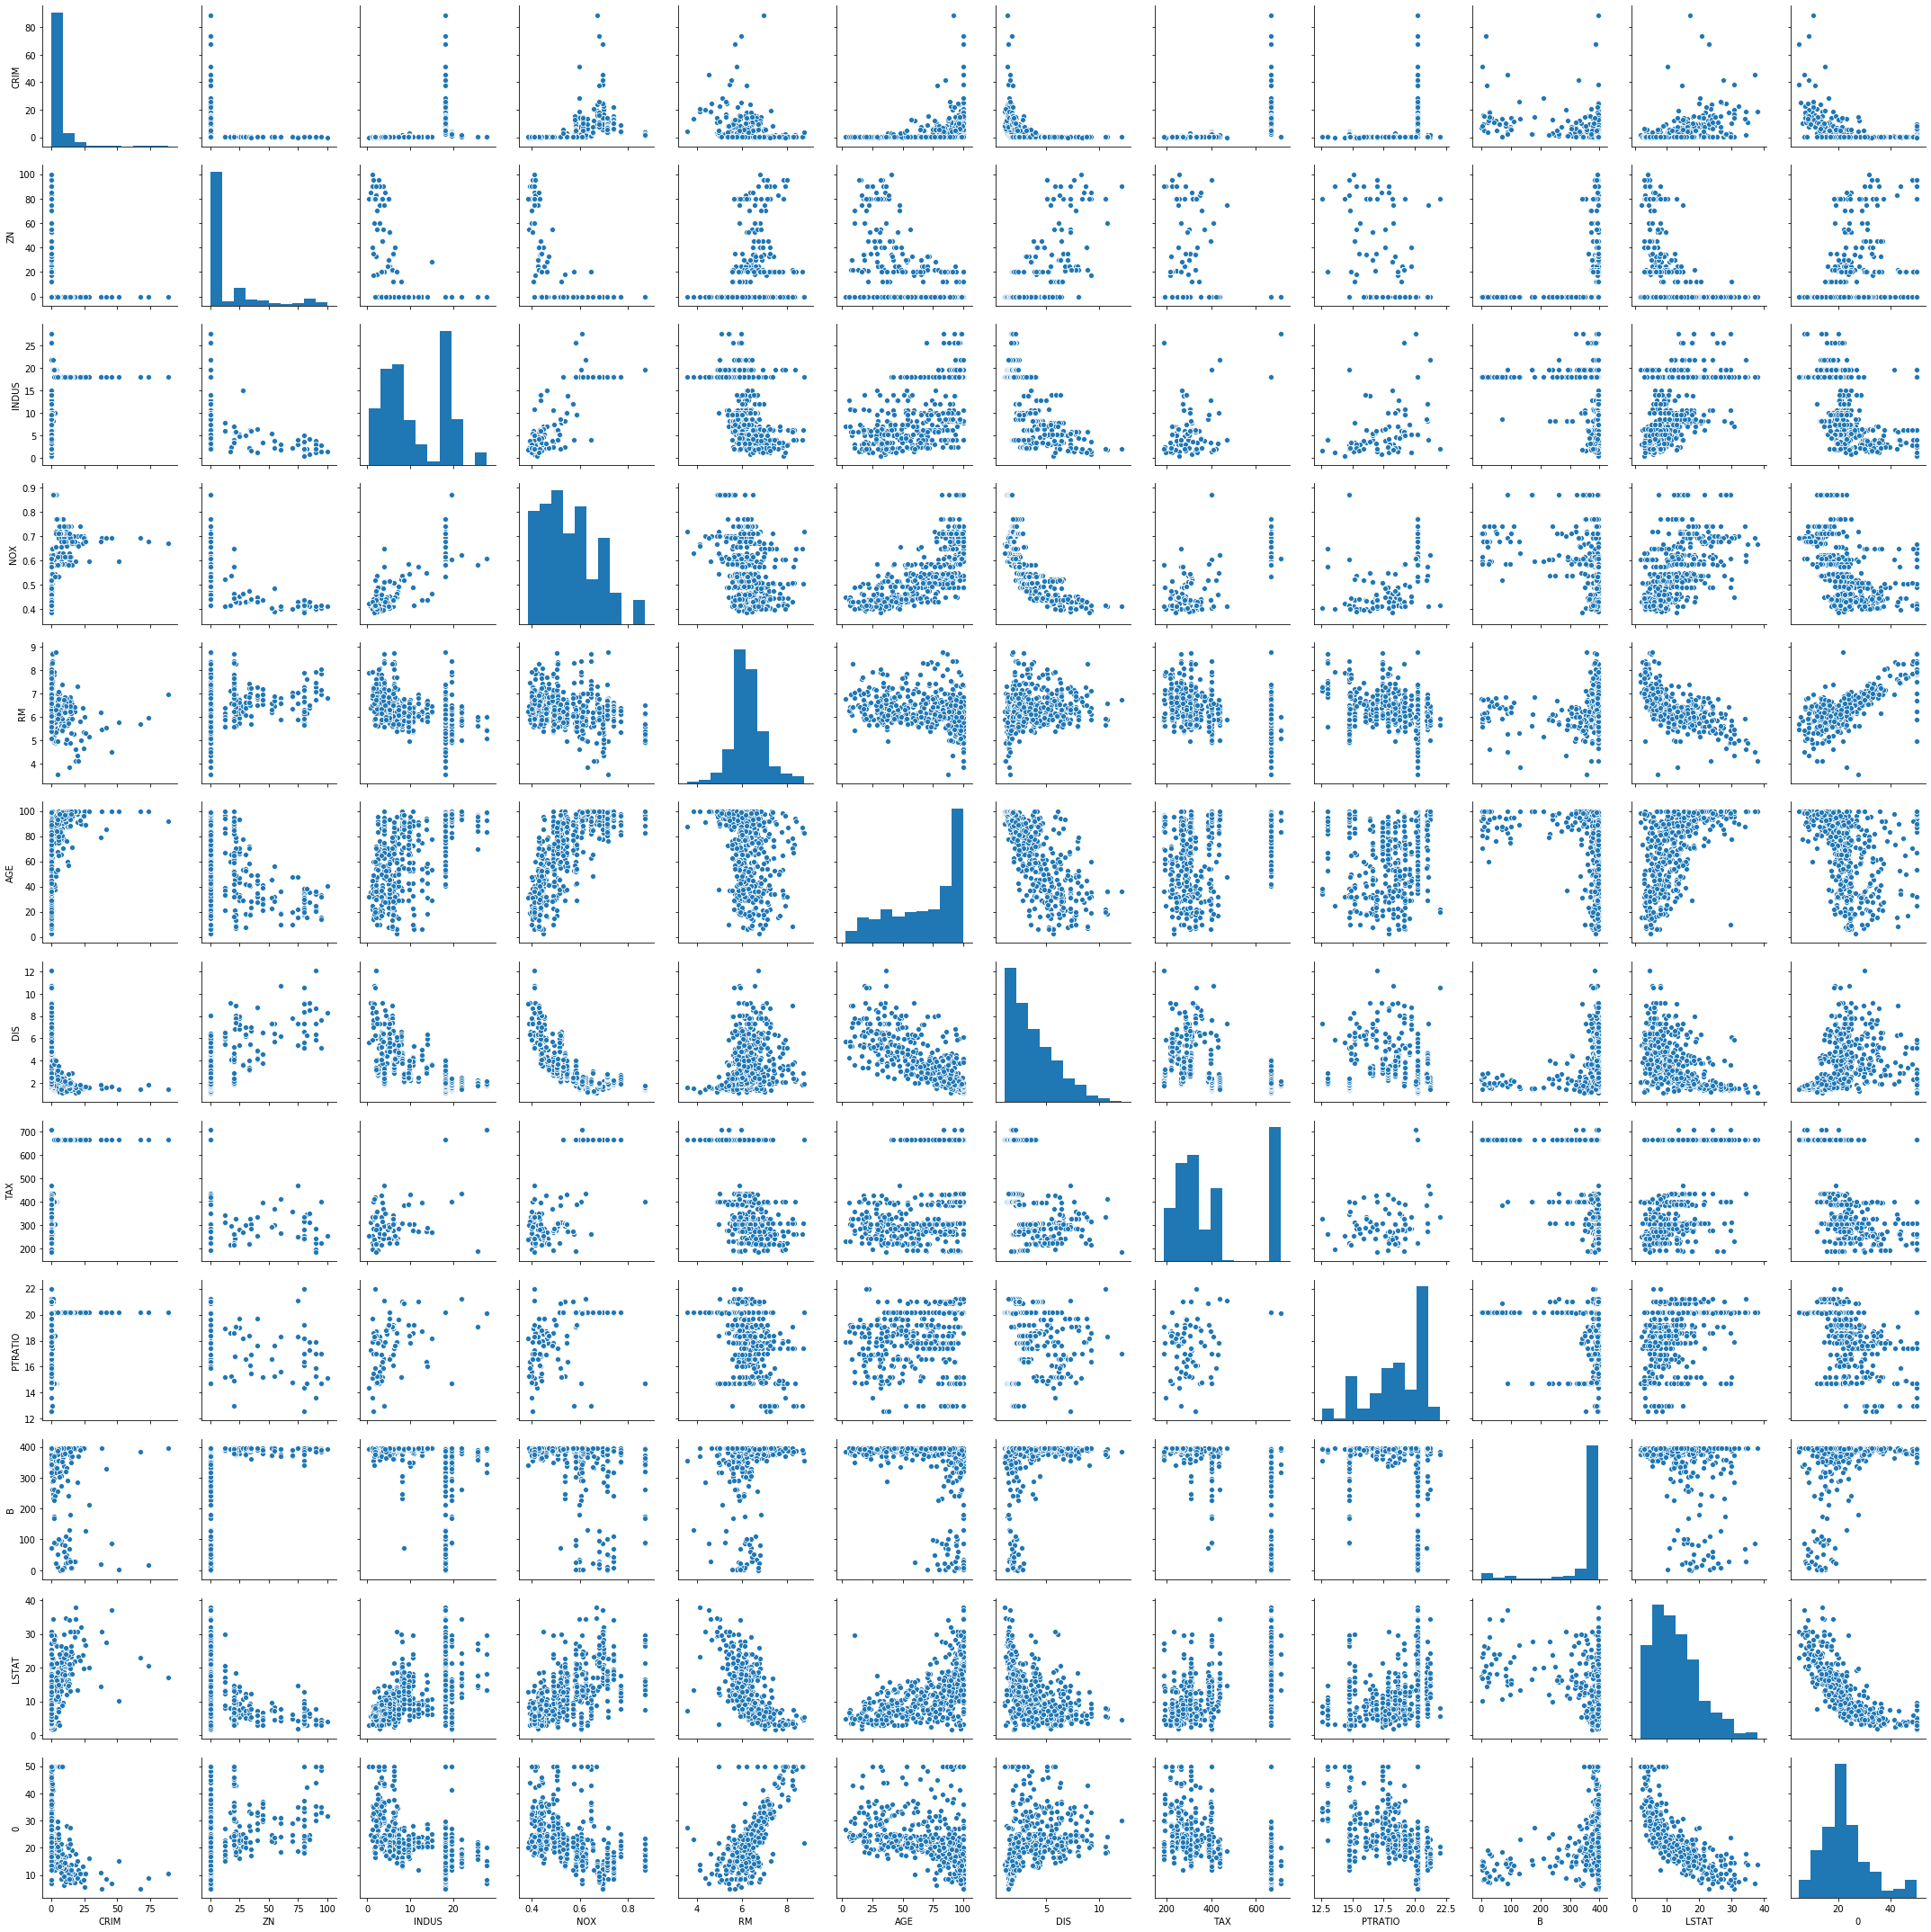

In [11]:
sns.pairplot(pd.concat([data.drop(['CHAS', 'RAD'], axis = 1), target], axis =1))

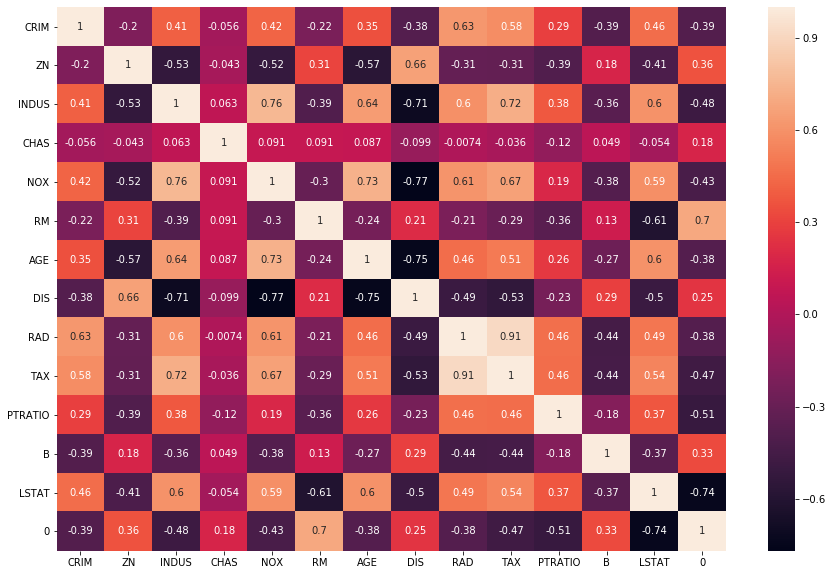

In [12]:
from matplotlib.pyplot import figure
figure(figsize = (15,10))
sns.heatmap(pd.concat([data, target], axis =1).corr(), annot = True)

In [13]:
data = data.drop(['RAD', 'CHAS', 'ZN'], axis =1)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.30, random_state = 101)

In [15]:
X_train.head()

,CRIM,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
204,0.02009,2.68,0.4161,8.034,31.9,5.1180,224.0,14.7,390.55,2.88
370,6.53876,18.10,0.6310,7.016,97.5,1.2024,666.0,20.2,392.05,2.96
485,3.67367,18.10,0.5830,6.312,51.9,3.9917,666.0,20.2,388.62,10.58
86,0.05188,4.49,0.4490,6.015,45.1,4.4272,247.0,18.5,395.99,12.86
241,0.10612,4.93,0.4280,6.095,65.1,6.3361,300.0,16.6,394.62,12.40


In [16]:
X_train.shape

(354, 10)

In [17]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
X_test.head()

,CRIM,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
195,0.01381,0.46,0.422,7.875,32.0,5.6484,255.0,14.4,394.23,2.97
4,0.06905,2.18,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33
434,13.91340,18.10,0.713,6.208,95.0,2.2222,666.0,20.2,100.63,15.17
458,7.75223,18.10,0.713,6.301,83.7,2.7831,666.0,20.2,272.21,16.23
39,0.02763,2.95,0.428,6.595,21.8,5.4011,252.0,18.3,395.63,4.32


In [19]:
lm.predict(np.array([0.5,1,0.44,5,20,3.2,666,21,300,5]).reshape(1,-1))

array([21.98181319])

In [20]:
np.array([0.5,1,0.44,5,20,3.2,666,21,300,5]).reshape(1,-1)

array([[5.00e-01, 1.00e+00, 4.40e-01, 5.00e+00, 2.00e+01, 3.20e+00,
        6.66e+02, 2.10e+01, 3.00e+02, 5.00e+00]])

In [21]:
lm.intercept_

35.416311172462734

In [22]:
pd.DataFrame(index = X_train.columns, data = lm.coef_, columns=['Coefficient'])

,Coefficient
CRIM,-0.046058
INDUS,-0.031672
NOX,-15.960030
RM,3.803496
AGE,0.010129
DIS,-1.192024
TAX,0.001694
PTRATIO,-1.033856
B,0.005985
LSTAT,-0.595125


In [26]:
import statsmodels.api as sm
from statsmodels.api import OLS

sm_lm = OLS(y_train, sm.add_constant(X_train))
result = sm_lm.fit()

C:\Users\MSI\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [27]:
result.params/result.bse

const      6.027624
CRIM      -1.181837
INDUS     -0.483137
NOX       -3.612415
RM         7.561649
AGE        0.655106
DIS       -5.439445
TAX        0.660475
PTRATIO   -7.095763
B          1.874149
LSTAT     -9.374405
dtype: float64

In [28]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     87.69
Date:                Mon, 18 Nov 2019   Prob (F-statistic):           3.26e-88
Time:                        09:15:40   Log-Likelihood:                -1046.6
No. Observations:                 354   AIC:                             2115.
Df Residuals:                     343   BIC:                             2158.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.4163      5.876      6.028      0.000      23.859      46.973
CRIM          -0.0461      0.039     -1.182      0.238      -0.123       0.031
INDUS         -0.0317      0.066     -0.483      0.629      -0.161       0.097
NOX          -15.9600      4.418     -3.612      0.000     -24.650      -7.270
RM             3.8035      0.503      7.562      0.000       2.814       4.793
AGE            0.0101      0.015      0.655      0.513      -0.020       0.041
DIS           -1.1920      0.219     -5.439      0.000      -1.623      -0.761
TAX            0.0017      0.003      0.660      0.509      -0.003       0.007
PTRATIO       -1.0339      0.146     -7.096      0.000      -1.320      -0.747
B              0.0060      0.003      1.874      0.062      -0.000       0.012
LSTAT         -0.5951      0.063     -9.374      0.000      -0.720      -0.470
==============================================================================
Omnibus:                      159.879   Durbin-Watson:                   1.755
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              860.365
Skew:                           1.858   Prob(JB):                    1.49e-187
Kurtosis:                       9.672   Cond. No.                     1.46e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Linear Regression with Categorical Data

In [29]:
import seaborn as sns
tips = sns.load_dataset('tips')

In [30]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [31]:
tips = pd.get_dummies(data = tips, drop_first = True, columns = ['sex', 'smoker', 'day', 'time'])

In [32]:
tips.head()

,total_bill,tip,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,1.01,2,1,1,0,0,1,1
1,10.34,1.66,3,0,1,0,0,1,1
2,21.01,3.50,3,0,1,0,0,1,1
3,23.68,3.31,2,0,1,0,0,1,1
4,24.59,3.61,4,1,1,0,0,1,1


In [33]:
X_train, X_test, y_train, y_test = train_test_split(tips.drop('tip', axis = 1), tips['tip'], test_size = 0.3, 
                                                    random_state = 101)

In [34]:
lm_tips = LinearRegression()
lm_tips.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
lm_tips.intercept_

0.42328249317459443

In [36]:
pd.DataFrame(index = X_train.columns, data = lm_tips.coef_, columns=['Coefficient'])

,Coefficient
total_bill,0.108300
size,0.143763
sex_Female,0.071772
smoker_No,0.210216
day_Fri,0.209814
day_Sat,0.161066
day_Sun,0.051977
time_Dinner,-0.163317


## Predicting Train Data

Text(0, 0.5, 'predicted Y')

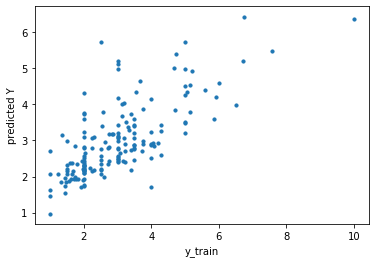

In [39]:
predictions = lm_tips.predict(X_train)
plt.scatter(y_train, predictions, s=10)
plt.xlabel('y_train')
plt.ylabel('predicted Y')

In [40]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_train, predictions))
print('MSE:', metrics.mean_squared_error(y_train, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, predictions)))
print('R2 Score:', metrics.r2_score(y_train,predictions))

MAE: 0.7032511490019798
MSE: 0.9012901411445148
RMSE: 0.9493630186311846
R2 Score: 0.53168845152304


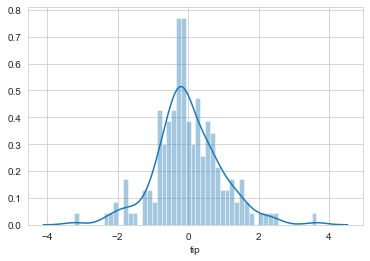

In [41]:
sns.set_style(style = 'whitegrid')
sns.distplot((y_train-predictions),bins = 50)

In [42]:
residual = y_train - predictions

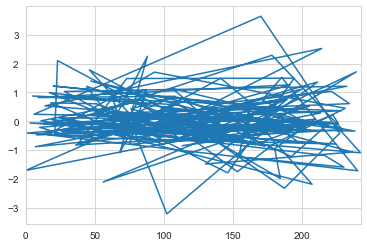

In [43]:
residual.plot()

## Autocorellation

Jika satu observasi value ada hubungan dengan value yang ada di dalam satu kolom. Biasa di data-data waktu

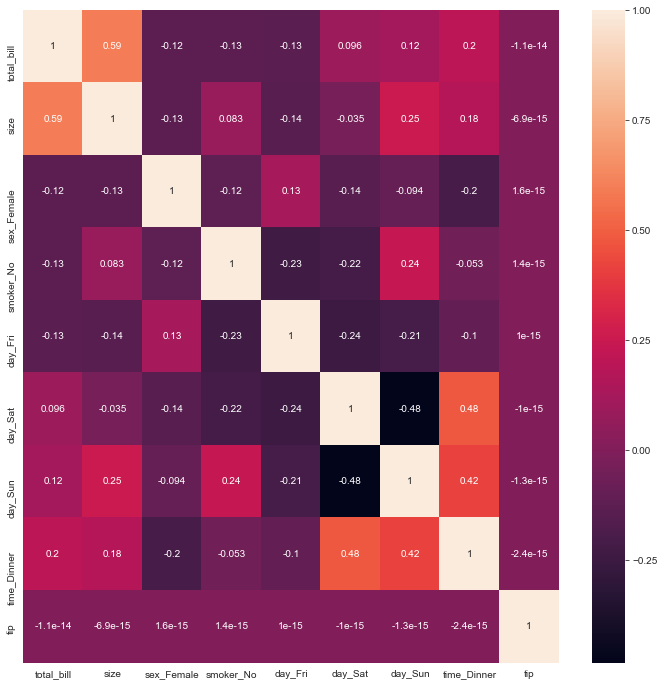

In [44]:
plt.figure(figsize = (12,12))
sns.heatmap(pd.concat([X_train, pd.Series(residual)], axis = 1).corr(), annot = True)

## Predicting Test Data

Text(0, 0.5, 'predicted Y')

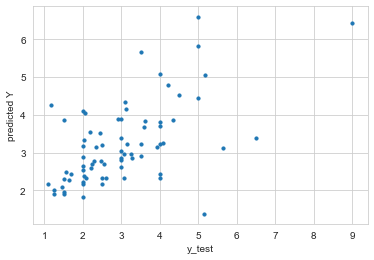

In [46]:
predictions = lm_tips.predict(X_test)
plt.scatter(y_test, predictions, s=10)
plt.xlabel('y_test')
plt.ylabel('predicted Y')

In [47]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2 Score:', metrics.r2_score(y_test,predictions))

MAE: 0.843052257069498
MSE: 1.33485535630891
RMSE: 1.1553594056867802
R2 Score: 0.2843912582093555


## Underfitting

Dimana model pada saat predict ke train dan test hasilnya buruk. Mungkin kekurangan data

## Overfitting

Dimana model pada saat predict ke train hasilnya bagus, tapi pada saat predict ke test hasilnya buruk. Mungkin kebanyakan fitur

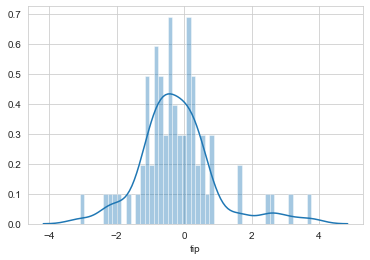

In [48]:
sns.distplot((y_test-predictions), bins = 50)

In [49]:
matrix = []
for i, j in zip(predictions, y_test):
    matrix.append([i, j, abs(i-j), (abs(i-j)/j)*100])
selisih = pd.DataFrame(matrix, columns = ['Prediction', 'Actual', 'Selisih', 'Selisih %'])    
selisih.head()

,Prediction,Actual,Selisih,Selisih %
0,2.231664,2.00,0.231664,11.583198
1,2.844349,3.27,0.425651,13.016859
2,2.330104,4.00,1.669896,41.747409
3,3.832081,3.61,0.222081,6.151818
4,3.809614,4.00,0.190386,4.759657


In [50]:
print('Jumlah prediksi yang menyimpang diatas 20% : {}'.format(len(selisih[selisih['Selisih %'] > 20])))
print('Presentasi prediksi yang menyimpang diatas 20% : {}%'.format(((len(selisih[selisih['Selisih %'] > 20])/len(predictions))*100)))
selisih[selisih['Selisih %'] > 20]

Jumlah prediksi yang menyimpang diatas 20% : 40
Presentasi prediksi yang menyimpang diatas 20% : 54.054054054054056%


,Prediction,Actual,Selisih,Selisih %
2,2.330104,4.00,1.669896,41.747409
5,2.085166,1.47,0.615166,41.847996
6,6.440440,9.00,2.559560,28.439552
8,1.384643,5.15,3.765357,73.113722
9,1.897103,1.50,0.397103,26.473505
10,3.256183,4.08,0.823817,20.191586
12,1.914431,1.25,0.664431,53.154446
16,2.421075,4.00,1.578925,39.473136
17,3.336999,2.03,1.306999,64.384206
18,2.278319,1.63,0.648319,39.774151


## Ridge Regression

In [51]:
from sklearn.linear_model import Ridge

In [52]:
rlm = Ridge(alpha = 0.1, normalize = True)

In [53]:
rlm.fit(X_train, y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001)

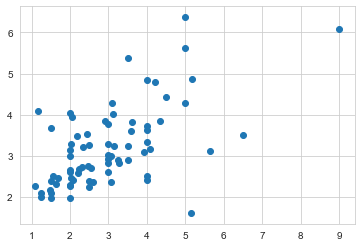

In [54]:
predictions = rlm.predict(X_test)
plt.scatter(y_test, predictions)

In [55]:
rlm.intercept_

0.6012484741616615

In [56]:
rlm.coef_

array([ 0.09413122,  0.19927286,  0.04729409,  0.13958075,  0.08798484,
        0.04533571, -0.04887285, -0.03971219])

In [60]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2 Score:', lm_tips.score(X_test, y_test))

MAE: 0.8346547651236218
MSE: 1.2730711070394605
RMSE: 1.1283045276163082
R2 Score: 0.2843912582093555


## Lasso Regression

In [61]:
from sklearn.linear_model import Lasso

In [62]:
llm = Lasso(alpha = 0.1)

In [63]:
llm.fit(X_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

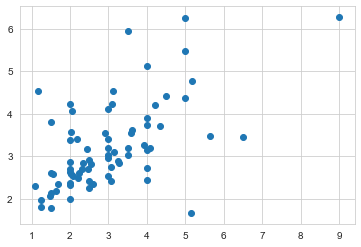

In [64]:
predictions = llm.predict(X_test)
plt.scatter(y_test, predictions)

In [65]:
llm.coef_

array([ 0.11256056,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        ])

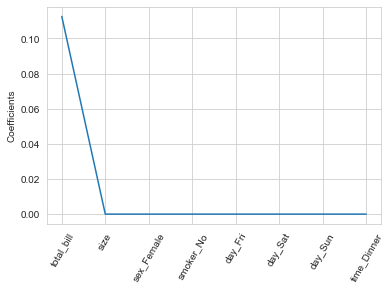

In [66]:
_ = plt.plot(range(len(X_train.columns)), llm.coef_)
_ = plt.xticks(range(len(X_train.columns)), X_train.columns, rotation = 60)
_ = plt.ylabel('Coefficients')
plt.show()

In [67]:
llm.coef_

array([ 0.11256056,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        ])

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2 Score:', lm.score(X_test, y_test))